# 02 - *generators* for n-model data

In the previous tutorial, we learned how to generate data using the **distribution** module.
This tutorial will focus on generating multi-model data, such as **multi-Gaussian** and **mixture-model** data.

To do this, we can use the **generators** module from `pyMultiFit` library,

## Example 1: 3-Gaussian


In [1]:
import numpy as np
from scipy.stats import norm

from pymultifit.generators import multi_gaussian

fs = 14

Let's say we want to generate 3 standard Gaussian distributions with $\mu_i = [-3, 1, 3]$ and $\sigma_i = [0.1, 0.4, 1.5]$.
We can call the **multi_gaussian** function to handle this with an x-value array.
The **multi_gaussian** function accepts four parameters,

* `x`: The array for which the Gaussian data is to be generated.
* `params`: The `params` takes a list of tuples, where each tuple defines a single Gaussian distribution. Each tuple contains:
	1. $A_i$: Amplitude of the Gaussian, controlling the height of the curve.
	2. $\mu_i$: Mean of the Gaussian, determining its center along the x-axis.
	3. $\sigma_i$: Standard deviation of the Gaussian, which sets the spread or width of the curve.
* `noise_level`: Standard deviation of Gaussian noise to be added to the data.
* `normalize`: Boolean to declare whether to normalize the distribution or not.

For standard distribution data we set **normalize** to `True` while giving the **amplitude** value as `1.0` (optional, but good practice).
The **normalize** keyword is necessary to generate normalized data as the **multi_gaussian** function uses the **GaussianDistribution** at backend.

In [2]:
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 10_000)

parameters = [(1, -3, 0.1), (1, 1, 0.4), (1, 3, 1.5)]
multifit_y = multi_gaussian(x, parameters, normalize=True)

That's all, easy and straight forward.
Now let's plot to see the distributions.

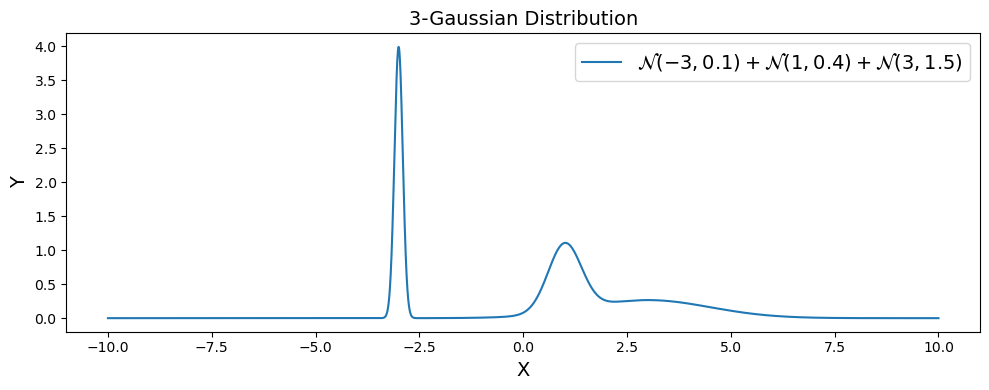

In [3]:
plt.figure(figsize=(10, 4))

plt.plot(x, multifit_y,
         label=r'$\mathcal{N}(-3,0.1) + \mathcal{N}(1,0.4) + \mathcal{N}(3,1.5)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('3-Gaussian Distribution', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

To re-verify that the distribution generated are correct, we can use `numpy.all_close()` against **scipy** generated distributions.

In [4]:
scipy_y = np.zeros_like(x, dtype=float)
for param in parameters:
    # don't include amplitude, which is at 0 index for each parameter
    scipy_y += norm(loc=param[1], scale=param[2]).pdf(x)

np.allclose(multifit_y, scipy_y)

True

That's great to know that the function is indeed working as intended.
Now let's see how **amplitude** and **noise_level** can help generate more realistic data.

## Example 2: 3-Gaussian with amplitude

For the Gaussian distributions to be non-normal, we will keep the **normalize** parameter to `False`.

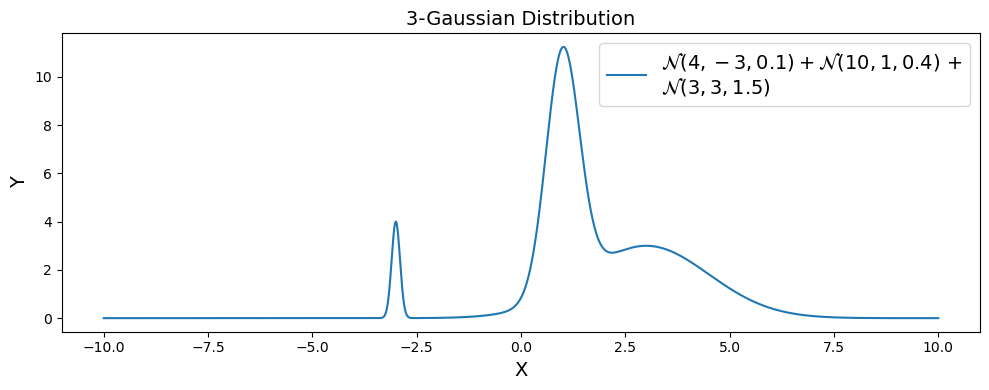

In [12]:
parameters = [(4, -3, 0.1), (10, 1, 0.4), (3, 3, 1.5)]
multifit_y_with_amplitude = multi_gaussian(x, parameters)

plt.figure(figsize=(10, 4))
plt.plot(x, multifit_y_with_amplitude,
         label=r'$\mathcal{N}(4,-3,0.1) + \mathcal{N}(10,1,0.4)$ +' + '\n'
               r'$\mathcal{N}(3,3,1.5)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('3-Gaussian Distribution', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

We again verify our obtained value with the standard **scipy** distributions using some tweaking.

In [6]:
scipy_y = np.zeros_like(x, dtype=float)
for param in parameters:
    # don't include amplitude, which is at 0 index for each Gaussian parameter set
    norm_ = np.sqrt(2 * np.pi * param[2]**2)
    scipy_y += norm(loc=param[1], scale=param[2]).pdf(x) * (param[0] * norm_)

np.allclose(multifit_y_with_amplitude, scipy_y)

False

Working as expected! Great!

## Example 3: 3-Gaussian with amplitude and noise


Now, let's add random noise to the data, using the **noise_level** parameter, with $\sigma = 0.1$.

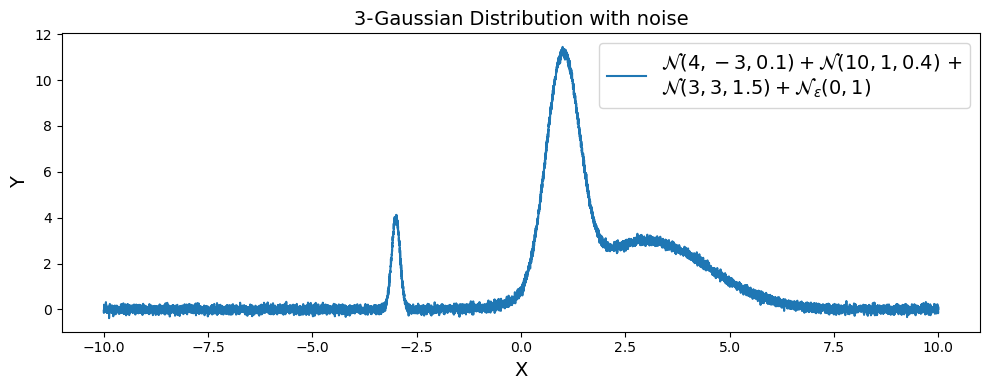

In [13]:
parameters = [(4, -3, 0.1), (10, 1, 0.4), (3, 3, 1.5)]
multifit_y_with_noise = multi_gaussian(x, parameters, noise_level=0.1)

plt.figure(figsize=(10, 4))
plt.plot(x, multifit_y_with_noise,
         label=r'$\mathcal{N}(4,-3,0.1) + \mathcal{N}(10,1,0.4)$ +' + '\n' +
               r'$\mathcal{N}(3,3,1.5) + \mathcal{N}_\epsilon(0,1)$')
plt.xlabel('X', fontsize=fs)
plt.ylabel('Y', fontsize=fs)
plt.title('3-Gaussian Distribution with noise', fontsize=fs)
plt.legend(loc='best', fontsize=fs)
plt.tight_layout()
plt.show()

This concludes the tutorial on how to use **generator** module to generate **multi-Gaussian** distribution data.
Next, we'll learn about how to generate mixture-model data.